In [1]:
from gensim.models import Doc2Vec
from mofgraph2vec.featurize.mof2doc import MOF2doc
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from collections import Counter

/Users/xiaoqi/opt/miniconda3/envs/mofgraph2vec/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Trained models
- RSM (all): offline-run-20230522_162618-x9wyb8li
- RSM (nodes): offline-run-20230522_165952-z2adw60i

In [2]:
model_all = Doc2Vec.load("../../experiments/workflow/wandb/offline-run-20230522_162618-x9wyb8li/tmp/embedding_model.pt")
model_nodes = Doc2Vec.load("../../experiments/workflow/wandb/offline-run-20230522_165952-z2adw60i/tmp/embedding_model.pt")

In [6]:
property_bin = ["pure_CO2_kH_%s" %i for i in range(10)]
nodes_list = [
    "Er_N_N_N_O_O_O_O_O_O", "Pr_N_N_N_O_O_O_O_O_O_N_C_C_Pr_N_C_C_Pr_N_C_C_Pr_O_C_Pr_O_C_Pr_O_C_Pr_O_C_Pr_O_C_Pr_O_C_Pr",
    "Co_O_O_O_O_O_C_Co_O_C_Co_O_C_Co_O_C_Co_Mn_O_C_Co_C_C_O_O_Co_O_O_O_O_O_C_Co_C_C_O_O_Co_O_O_O_O_O_C_Co_C_C_O_O_Co_O_O_O_O_O_C_Co_Mn_C_C_O_O_Co_O_O_O_O_Mn_O_O_O_O_O_O",
    "Mn_O_O_O_O_C_Mn_O_C_Mn_O_C_Mn_Mn_O_C_Mn_C_C_O_O_Mn_O_O_O_O_C_Mn_C_C_O_O_Mn_O_O_O_O_C_Mn_Mn_C_C_O_O_Mn_O_O_O_Mn_O_O_O_O_O_O",
    "Mn_O_O_O_O_O_O_C_Mn_O_C_Mn_O_Mn_P_O_Mn_P_O_Mn_P",
    "Ni_N_N_O_O_N_C_C_Ni_N_C_C_Ni_O_C_Ni_O_C_Ni_N_C_C_Ni_C_C_C_H_N_C_C_H_N_Ni_N_N_O_O_N_C_C_Ni_C_C_C_H_N_C_C_H_N_Ni_N_N_O_O_O_C_Ni_C_C_C_O_Ni_N_N_O_O_O_C_Ni_C_C_C_O_Ni_N_N_O_O",
    "Cu_O_O_O_O_O", "Cu_N_N_O_N_Cu_N_N_N_Cu_N_N_O_Cu_Cu_Cu_N_Cu_N_N_Cu_N_N_O_N_C_N_N_Cu_N_N_N_Cu_N_N_Cu_N_N_O_N_C_N_N_Cu_N_N_O_Cu_Cu_Cu_Cu_N_N_O_Cu_N_N_O_Cu_N_N_O",
    "Zn_O_O_O_O", "Zn_N_N_N_N", "Co_N_N_N_N", "Co_O_O_O_O_O_O", "Ca_N_O_O_O_O_O_O"
]

In [44]:
cosines = []
for prop in property_bin:
    prop_cos = []
    for node in nodes_list:
        v0 = model_all.wv[prop]
        v1 = model_all.wv[node]

        cos = np.dot(v0,v1)/(norm(v0)*norm(v1))
        prop_cos.append(cos)
    cosines.append(prop_cos)

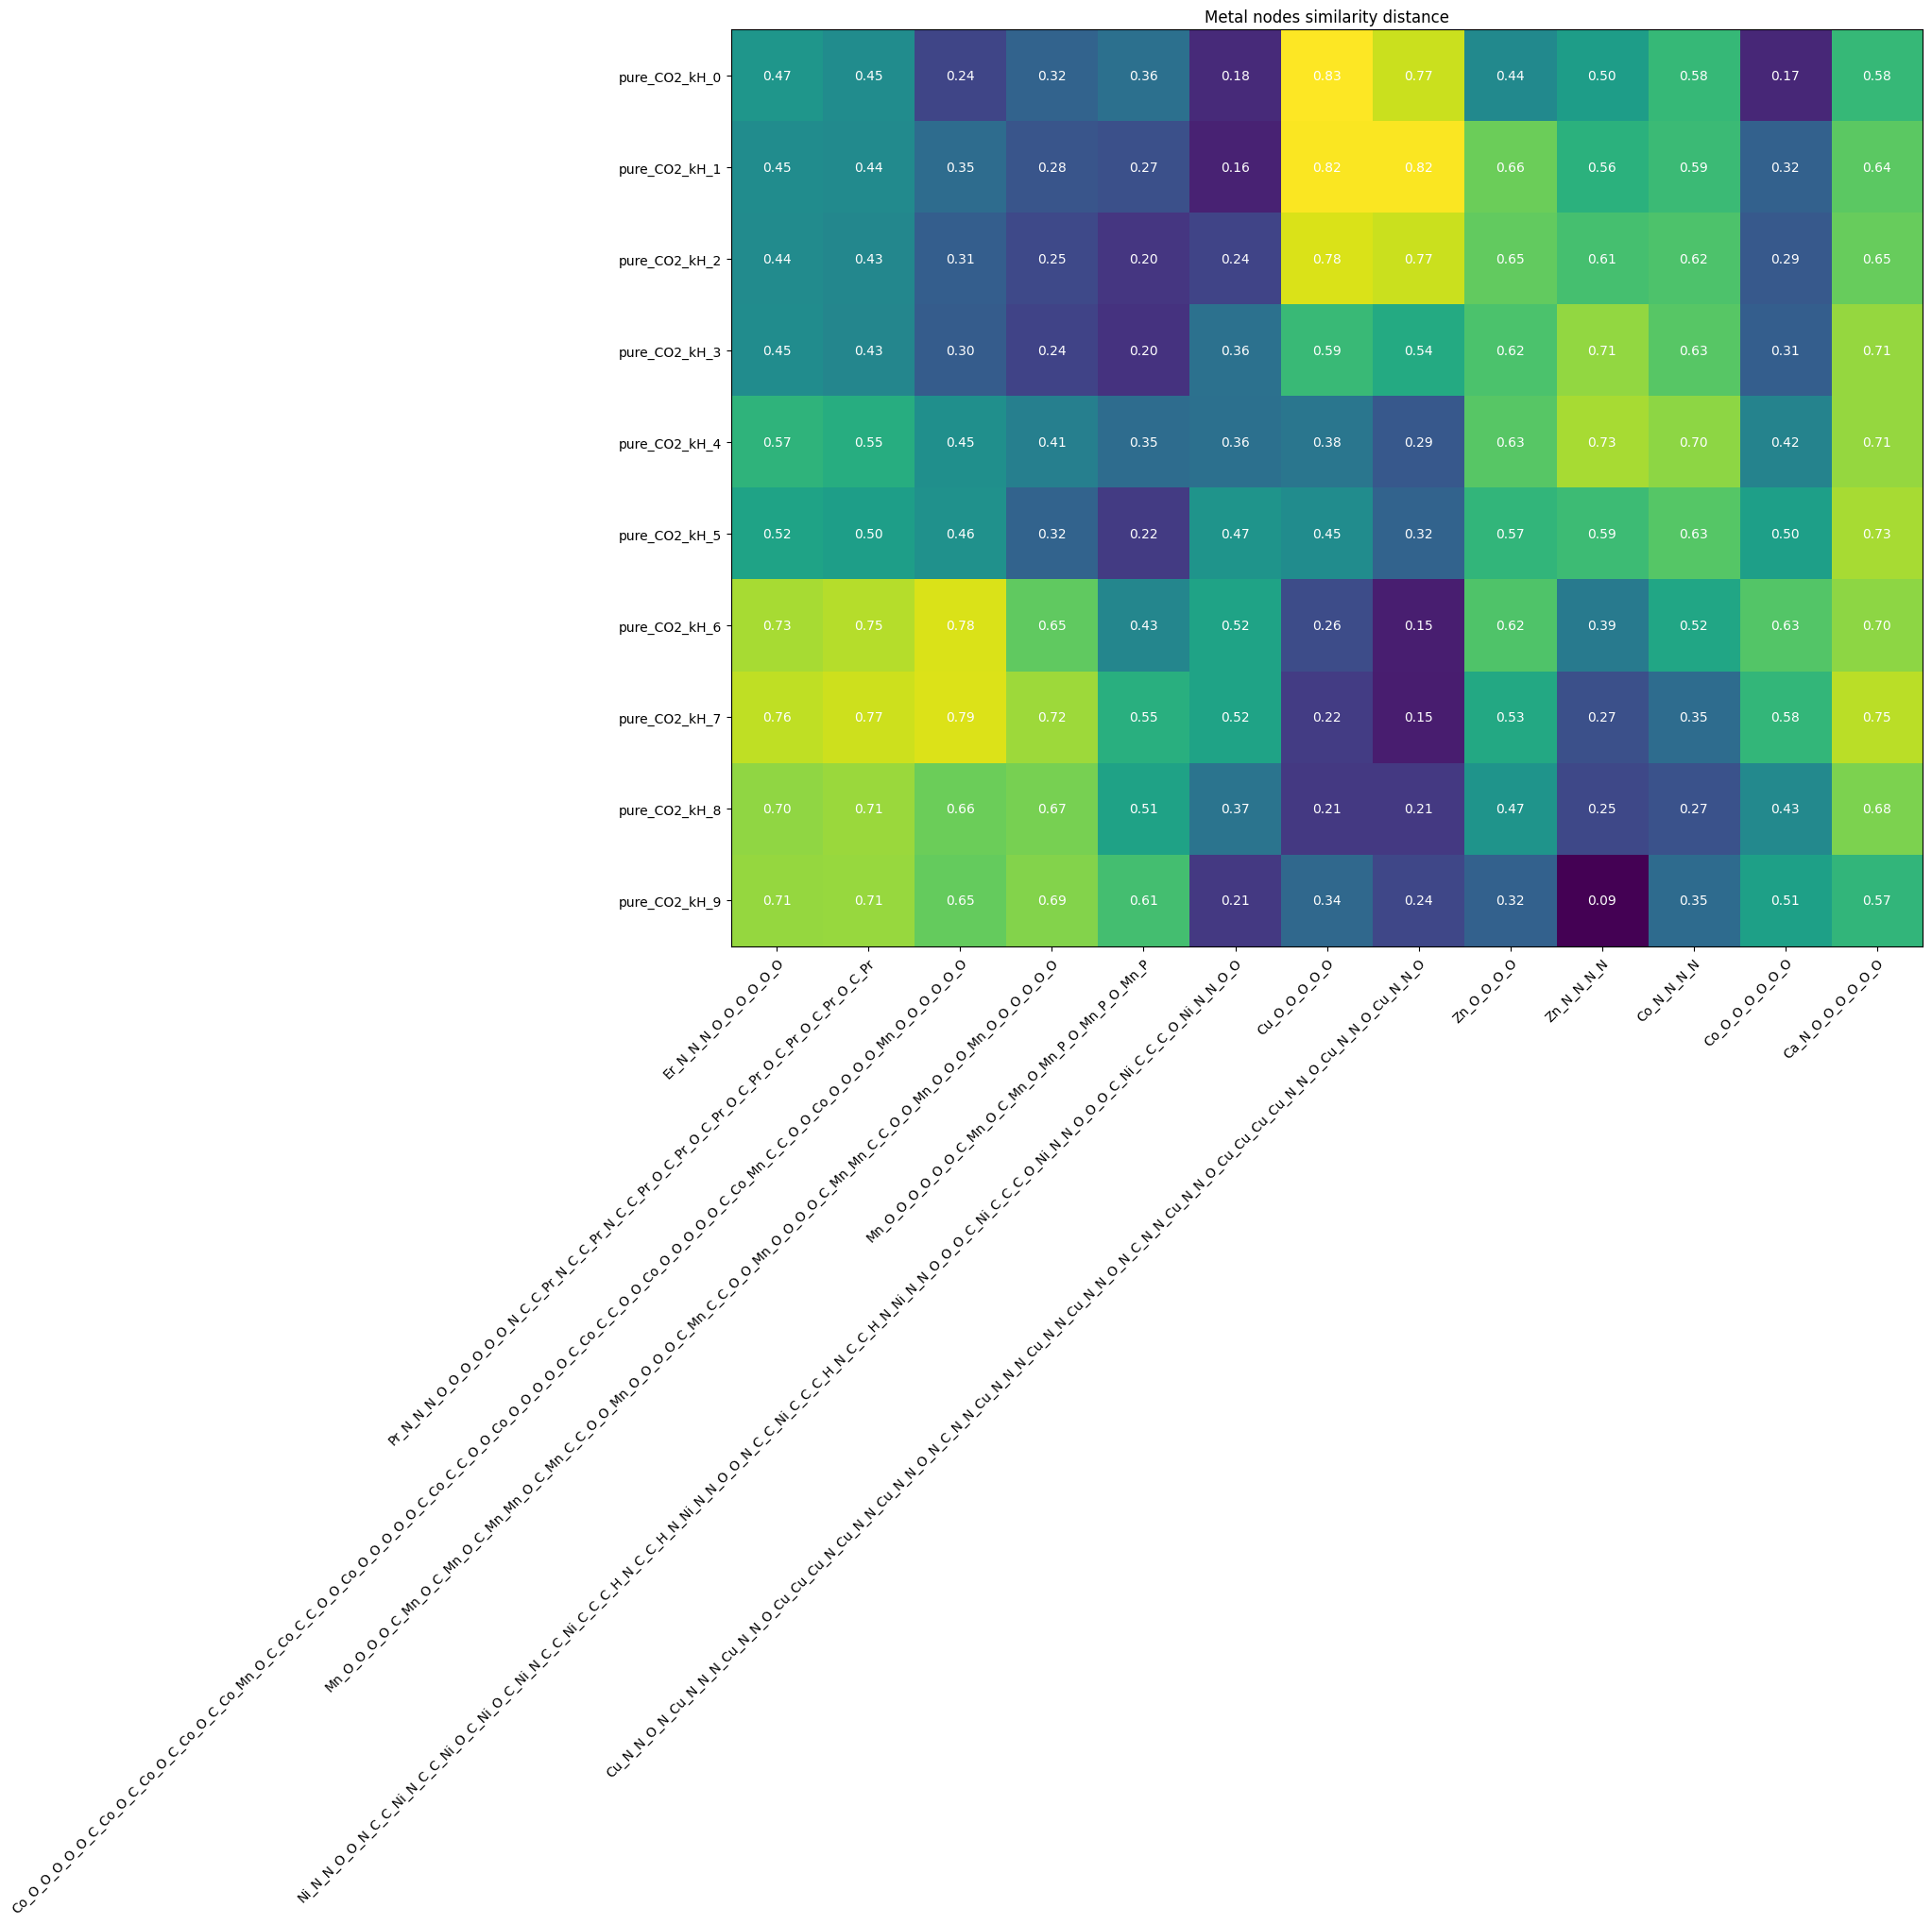

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
im = ax.imshow(cosines)

ax.set_xticks(np.arange(len(nodes_list)), labels=nodes_list)
ax.set_yticks(np.arange(len(property_bin)), labels=property_bin)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(property_bin)):
    for j in range(len(nodes_list)):
        text = ax.text(j, i, "%.2f" %cosines[i][j],
                       ha="center", va="center", color="w")
        
ax.set_title("Metal nodes similarity distance")
fig.tight_layout()
plt.show()

In [8]:
model_nodes.wv.key_to_index

{'pure_methane_kH_4': 0,
 'pure_CO2_kH_0': 1,
 'pure_methane_kH_7': 2,
 'pure_methane_widomHOA_1': 3,
 'pure_CO2_kH_3': 4,
 'pure_CO2_kH_9': 5,
 'pure_methane_widomHOA_4': 6,
 'pure_CO2_widomHOA_4': 7,
 'pure_CO2_kH_6': 8,
 'pure_methane_kH_0': 9,
 'pure_methane_widomHOA_6': 10,
 'pure_methane_widomHOA_9': 11,
 'pure_methane_widomHOA_0': 12,
 'pure_CO2_kH_8': 13,
 'pure_CO2_widomHOA_0': 14,
 'pure_methane_kH_1': 15,
 'pure_CO2_widomHOA_6': 16,
 'pure_CO2_widomHOA_9': 17,
 'pure_methane_widomHOA_3': 18,
 'pure_methane_kH_3': 19,
 'pure_CO2_widomHOA_3': 20,
 'pure_CO2_widomHOA_1': 21,
 'pure_methane_widomHOA_8': 22,
 'pure_CO2_kH_5': 23,
 'pure_methane_widomHOA_5': 24,
 'pure_methane_kH_9': 25,
 'pure_CO2_widomHOA_2': 26,
 'pure_CO2_kH_4': 27,
 'pure_CO2_kH_7': 28,
 'pure_methane_widomHOA_2': 29,
 'pure_CO2_widomHOA_8': 30,
 'pure_CO2_widomHOA_7': 31,
 'pure_methane_kH_2': 32,
 'pure_CO2_kH_2': 33,
 'pure_CO2_widomHOA_5': 34,
 'pure_methane_widomHOA_7': 35,
 'pure_methane_kH_8': 36,
 'pu

In [4]:
model.wv.key_to_index

{'H_C': 0,
 'C_C_C_H': 1,
 'H_C_C_C_C_H': 2,
 'C_C_O_O': 3,
 'C_C_C_C': 4,
 'C_C_C_C_C_C_C_H_C_C_C_H_C_C_O_O': 5,
 'C_C_C_H_C_C_C_C_C_C_C_H_H_C': 6,
 'H_C_C_C_C_H_C_C_C_H_C_C_C_C_C_C_C_H_H_C': 7,
 'H_C_C_C_H_N': 8,
 'C_C_H_N': 9,
 'H_C_C_C_C_H_C_C_C_H_C_C_C_C_C_C_C_C_H_C': 10,
 'C_C_C_H_C_C_C_C_C_C_C_C_H_C': 11,
 'O_C': 12,
 'C_C_C_N': 13,
 'O_C_C_C_O_O': 14,
 'C_C_C_C_C_C_C_C_C_C_C_H_C_C_C_H': 15,
 'H_C_C_C_C_H_C_C_C_H_C_C_C_C_C_C_H_N_H_C': 16,
 'C_C_C_H_C_C_C_C_C_C_H_N_H_C': 17,
 'O_C_Zn': 18,
 'C_C_C_H_C_C_C_C_C_C_C_H_H_C_C_C_C_C_C_C_C_H_C_C_C_H_C_C_O_O_C_C_C_H_C_C_C_C_C_C_C_H_H_C_H_C_C_C_C_H': 19,
 'C_C_C_H_C_C_C_C_C_C_C_C_H_C_C_C_C_C_C_C_C_H_C_C_C_H_C_C_O_O_C_C_C_C_C_C_C_H_C_C_C_H_C_C_O_O_H_C_C_C_C_H': 20,
 'H_O': 21,
 'C_C_C_O': 22,
 'H_C_C_C_C_H_C_C_C_H_C_C_C_H_C_C_C_H_H_C': 23,
 'C_C_C_H_C_C_C_H_C_C_C_H_H_C': 24,
 'C_C_O_O_C_C_C_C_O_C_Zn_O_C_Zn': 25,
 'N_C_C_C': 26,
 'C_C_C_H_H': 27,
 'H_C_C_C_C_H_H': 28,
 'C_H_N_N': 29,
 'H_C_C_H_N_N': 30,
 'H_N': 31,
 'O_C_Cd': 32,
 'H_C_C_C_

In [59]:
a = model_all.wv["Ni_O_O_O_O_O"] - model_all.wv["Ni"]

In [60]:
b = model_all.wv["Mn_O_O_O_O_O"] - model_all.wv["Mn"]

In [61]:
np.dot(a, b)/(norm(a)*norm(b))

0.21034662

In [9]:
[model_all.wv.get_vecattr(node, "count") for node in nodes_list]

[1, 1, 2, 1, 3, 2, 22, 3, 303, 40, 13, 43, 2]

In [10]:
model_all.wv.get_vecattr("pure_CO2_kH_0", )

TypeError: get_vecattr() missing 1 required positional argument: 'attr'

In [29]:
model_div = []
pair = []

for i in range(len(model_all.dv)):
    for j in range(len(model_all.dv)):
        a = model_all.dv[i]
        b = model_all.dv[j]
        cos = np.dot(a, b)/(norm(a)*norm(b))
        pair.append((i, j))
        model_div.append(cos)

(array([  65826.,  306826.,  499832.,  621884.,  846570., 1305424.,
        2222350., 2731576., 1619934.,  368294.]),
 array([-0.96333867, -0.76700479, -0.5706709 , -0.37433705, -0.17800316,
         0.01833072,  0.21466461,  0.41099849,  0.60733235,  0.80366623,
         1.00000012]),
 <BarContainer object of 10 artists>)

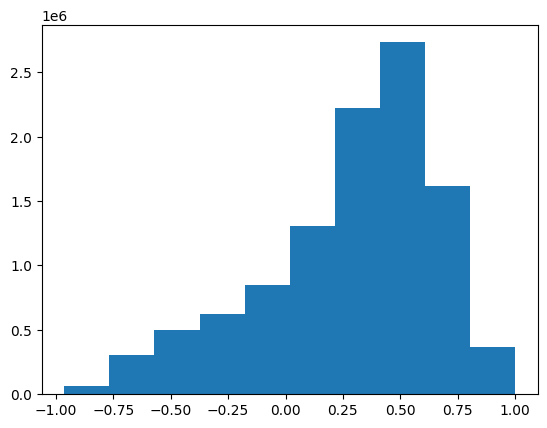

In [24]:
plt.hist(model_div)

In [31]:
pair[np.array(model_div).argmin()]

(145, 1069)

In [32]:
model_all.dv.index_to_key[145], model_all.dv.index_to_key[1069]

('RSM4255', 'RSM0132')

In [35]:
for id in range(len(model_div)):
    if (model_div[id] > 0.99) and (pair[id][0] != pair[id][1]):
        print(model_all.dv.index_to_key[pair[id][0]], model_all.dv.index_to_key[pair[id][1]])

RSM1099 RSM0868
RSM2547 RSM3921
RSM0191 RSM0167
RSM4491 RSM4564
RSM4491 RSM3232
RSM4491 RSM4467
RSM4491 RSM4513
RSM4491 RSM4464
RSM4491 RSM4514
RSM4491 RSM4488
RSM2962 RSM3068
RSM2962 RSM3079
RSM2745 RSM2746
RSM1270 RSM1269
RSM0783 RSM1225
RSM0783 RSM1419
RSM0973 RSM1115
RSM2625 RSM2633
RSM2625 RSM2035
RSM2625 RSM2018
RSM2625 RSM2835
RSM2631 RSM2459
RSM2631 RSM2639
RSM1304 RSM2034
RSM3275 RSM3294
RSM3088 RSM1350
RSM2432 RSM2256
RSM1852 RSM1814
RSM0769 RSM0735
RSM0769 RSM0776
RSM2778 RSM0572
RSM0379 RSM0386
RSM0379 RSM0252
RSM1067 RSM0122
RSM3894 RSM3951
RSM0386 RSM0379
RSM0386 RSM0252
RSM0390 RSM0868
RSM3699 RSM3865
RSM2236 RSM2075
RSM3896 RSM1663
RSM1065 RSM1380
RSM4486 RSM4083
RSM2746 RSM2745
RSM2034 RSM1304
RSM1515 RSM1689
RSM1273 RSM3042
RSM4280 RSM4262
RSM4294 RSM3363
RSM0025 RSM1887
RSM0031 RSM0075
RSM0582 RSM0495
RSM3921 RSM2547
RSM1887 RSM0025
RSM1663 RSM3896
RSM1138 RSM2893
RSM1689 RSM1515
RSM3920 RSM3410
RSM4083 RSM4486
RSM3263 RSM1297
RSM2633 RSM2625
RSM2633 RSM2035
RSM2633 

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("../../data/data.csv").set_index("cif.label")

In [41]:
df.loc["RSM1099"]["info.decorated_scaffold_hash"], df.loc["RSM0868"]["info.decorated_scaffold_hash"]

('0a69d6b009cf3d084c6c572e53d8b01e', '8bad2fab01b3c28d25b591f8e9b8e847')

In [52]:
for i in Counter(df["info.decorated_graph_hash"]).items():
    if i[1] > 1:
        print(i[0])

371bfd4223887481b90c902e444fd456


In [53]:
df[df["info.decorated_graph_hash"] == "371bfd4223887481b90c902e444fd456"]

,Unnamed: 0,in,ASA [m^2/cm^3],CellV [A^3],Df,Di,Dif,NASA [m^2/cm^3],POAV [cm^3/g],POAVF,...,CH4DC,CH4HPSTP,CH4LPSTP,KH_CH4_molkgpa,KH_N2_molkgpa,log_selectivity,info.decorated_graph_hash,info.undecorated_graph_hash,info.decorated_scaffold_hash,info.undecorated_scaffold_hash
cif.label,,,,,,,,,,,,,,,,,,,,,
RSM1872,3993,8573,1453.59,3027.47,3.93870,8.06665,8.06075,0.0,0.438506,0.50844,...,101.027726,275.543703,174.515977,0.000033,0.000007,0.685203,371bfd4223887481b90c902e444fd456,df5cc0e5412976855669b6b65fd3c20d,2edd7923170efa6013c89d6c6ab5fef1,cc6a0ea6a482d2688aab7c37c39c8bc2
RSM1926,3996,8576,0.00,3075.99,3.16932,8.12438,7.76610,1049.7,0.000000,0.00000,...,109.263773,255.952355,146.688582,0.000032,0.000006,NaN,371bfd4223887481b90c902e444fd456,df5cc0e5412976855669b6b65fd3c20d,2edd7923170efa6013c89d6c6ab5fef1,cc6a0ea6a482d2688aab7c37c39c8bc2


In [57]:
df.loc["RSM4467"].values

array([2411, 5426, 1377.03, 28731.7, 8.02039, 12.23219, 12.23219, 0.0,
       0.537312, 0.45838, 0.0, 0.0, 0.853098, 'XAKZIT_clean', 1377.03,
       1614.152184, 0.45838, 0.537312, 2.4025, 30.132, 34.4875, 56.8385,
       625.0, 1125.0, 1658.333333, 2716.666667, 1, 6.0, 8.666666667,
       13.66666667, 36.66666667, 96.33333333, 173.0, 247.3333333, 1.9321,
       6.1716, 9.804133333, 14.81276667, 0, -10.14, -8.816666667,
       -15.48666667, 0, 105.0, 150.3333333, 233.0, 0, 0, 0, 0, 0, 21.0,
       24.33333333, 43.66666667, 0, 3.9, 4.993333333, 8.34, 57.66,
       723.168, 827.7, 1364.124, 15000, 27000, 39800, 65200, 24, 144, 208,
       328, 880, 2312, 4152, 5936, 46.3704, 148.1184, 235.2992, 355.5064,
       0, -243.36, -211.6, -371.68, 0, 2520, 3608, 5592, 0, 0, 0, 0, 0,
       504, 584, 1048, 0, 93.6, 119.84, 200.16, 10.408, 12.92148,
       23.40896, 30.33716, 55.75, 69.9, 112.1, 116.75, 1, 1.55, 2.8, 3.75,
       2.65, 7.35, 11.05, 11.35, 0.54918, 0.883695, 1.43976, 1.666635,
    

In [59]:
df.loc["RSM4491"].values

array([2414, 5430, 1332.73, 14296.4, 7.46549, 12.09861, 12.09861,
       0.0305975, 0.514545, 0.45402, 0.0, 0.0, 0.882372, 'XALBES_clean',
       1332.760598, 1510.429385, 0.45402, 0.514545, 2.4025, 31.70266667,
       34.5185, 68.62883333, 625.0, 1183.333333, 2016.666667, 2800.0, 1,
       6.333333333, 9.0, 15.66666667, 41.0, 112.6666667, 203.0,
       280.3333333, 1.9321, 6.5191, 10.7447, 16.26763333, 0, -10.63666667,
       -8.32, -19.99333333, 0, 111.0, 144.3333333, 279.6666667, 0, 0, 0,
       0, 0, 23.66666667, 26.0, 58.0, 0, 4.113333333, 4.78, 10.07333333,
       57.66, 760.864, 828.444, 1647.092, 15000, 28400, 48400, 67200, 24,
       152, 216, 376, 984, 2704, 4872, 6728, 46.3704, 156.4584, 257.8728,
       390.4232, 0, -255.28, -199.68, -479.84, 0, 2664, 3464, 6712, 0, 0,
       0, 0, 0, 568, 624, 1392, 0, 98.72, 114.72, 241.76, 10.408,
       12.92148, 23.40896, 29.85116, 55.75, 69.9, 112.1, 123.5, 1, 1.55,
       2.8, 3.65, 2.65, 7.35, 10.9, 12.0, 0.54918, 0.883695, 1.43976,

In [103]:
import torch
from pymatgen.core import Element
from torch_geometric.utils import to_networkx

In [61]:
data = torch.load("../../data/meta/rsm/RSM0001.pt")

In [104]:
graph = to_networkx(data)

In [107]:
features_to_WL = {}
for i, item in enumerate(data.x.flatten()):
        features_to_WL.update({i: item})

In [108]:
for i, j in graph.edges:
    print(f"{features_to_WL[i]}_{features_to_WL[j]}")

Gd_O
Gd_O
Gd_O
Gd_O
Gd_O
Gd_O
H_C
H_C
H_C
C_H
C_O
C_O
C_H
C_O
C_O
C_H
C_O
C_O
O_C
O_Gd
O_C
O_Gd
O_C
O_Gd
O_C
O_Gd
O_C
O_Gd
O_C
O_Gd


In [66]:
eles = [Element(n[0]) for n in data.x]

In [99]:
Element("Cu").group

11

In [78]:
features_to_WL

{0: 'Gd',
 1: 'H',
 2: 'H',
 3: 'H',
 4: 'C',
 5: 'C',
 6: 'C',
 7: 'O',
 8: 'O',
 9: 'O',
 10: 'O',
 11: 'O',
 12: 'O'}

In [87]:
feature_affinity = {}
for i, ele in features_to_WL.items():
    feature_affinity.update({i: "%.2f" %Element(ele).electron_affinity})
feature_affinity

{0: '0.14',
 1: '0.75',
 2: '0.75',
 3: '0.75',
 4: '1.26',
 5: '1.26',
 6: '1.26',
 7: '1.46',
 8: '1.46',
 9: '1.46',
 10: '1.46',
 11: '1.46',
 12: '1.46'}

In [109]:
data

Data(x=[13, 1], edge_index=[2, 30], edge_attr=[30], nodes=[1], linker_scaffold=[5], linker_all=[8], linker_functional=[0], linker_connecting=[3])